In [5]:
import os

In [6]:
os.environ["MASTER_ADDR"] = "localhost"
os.environ["MASTER_PORT"] = "8888"

In [2]:
import torch

In [3]:
# Define the path to your checkpoint file (.pth)
checkpoint_path = 'dino_resnet50_pretrain_full_checkpoint.pth'

# Load the checkpoint
checkpoint = torch.load(checkpoint_path)

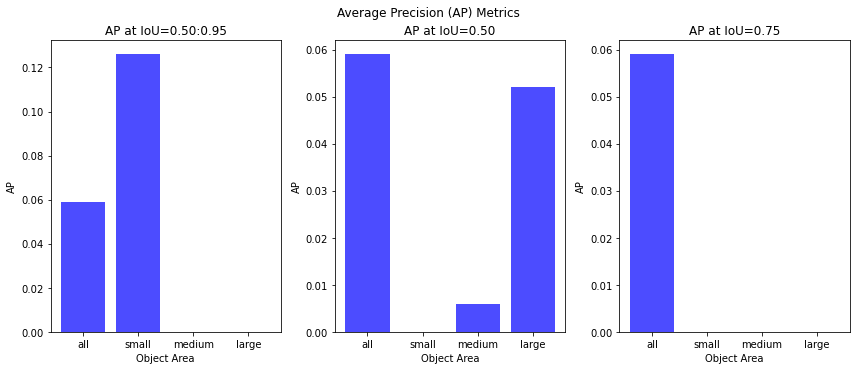

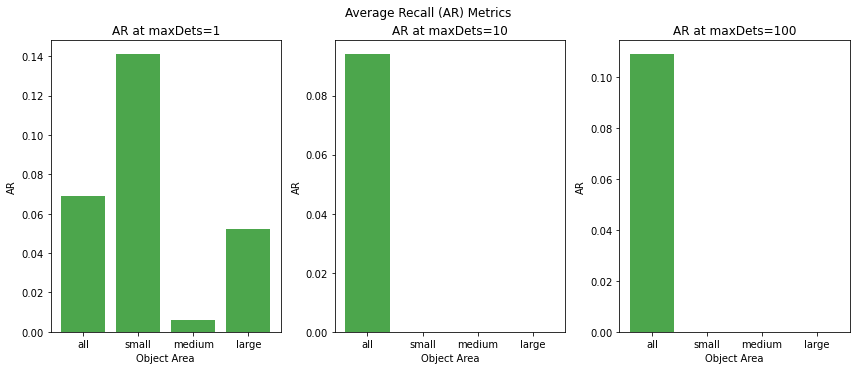

In [24]:
import matplotlib.pyplot as plt

# Define the data
iou_thresholds = ['IoU=0.50:0.95', 'IoU=0.50', 'IoU=0.75']
areas = ['all', 'small', 'medium', 'large']

# AP values for different IoU thresholds and areas
ap_values = {
    'IoU=0.50:0.95': [0.059, 0.126, 0.000, 0.000],
    'IoU=0.50': [0.059, 0.000, 0.006, 0.052],
    'IoU=0.75': [0.059, 0.000, 0.000, 0.000]
}

# AR values for different maxDets and areas
ar_values = {
    'maxDets=1': [0.069, 0.141, 0.006, 0.052],
    'maxDets=10': [0.094, 0.000, 0.000, 0.000],
    'maxDets=100': [0.109, 0.000, 0.000, 0.000]
}

# Plot Average Precision (AP)
plt.figure(figsize=(12, 5))
for i, iou_threshold in enumerate(iou_thresholds):
    plt.subplot(1, len(iou_thresholds), i + 1)
    plt.bar(areas, ap_values[iou_threshold], color='b', alpha=0.7)
    plt.xlabel('Object Area')
    plt.ylabel('AP')
    plt.title(f'AP at {iou_threshold}')

plt.tight_layout()
plt.suptitle('Average Precision (AP) Metrics', y=1.02)
plt.show()

# Plot Average Recall (AR)
plt.figure(figsize=(12, 5))
for maxDets, ar_data in ar_values.items():
    plt.subplot(1, len(ar_values), list(ar_values.keys()).index(maxDets) + 1)
    plt.bar(areas, ar_data, color='g', alpha=0.7)
    plt.xlabel('Object Area')
    plt.ylabel('AR')
    plt.title(f'AR at {maxDets}')

plt.tight_layout()
plt.suptitle('Average Recall (AR) Metrics', y=1.02)
plt.show()


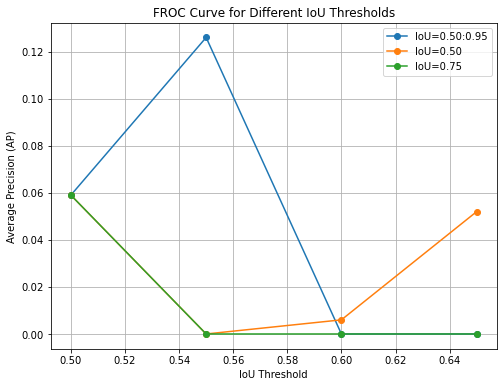

In [33]:
import matplotlib.pyplot as plt

# Define the IoU thresholds and corresponding AP values
iou_thresholds = [0.50, 0.55, 0.60, 0.65]
ap_values = {
    'IoU=0.50:0.95': [0.059, 0.126, 0.0, 0.0],
    'IoU=0.50': [0.059, 0.0, 0.006, 0.052],
    'IoU=0.75': [0.059, 0.0, 0.0, 0.0]
}

# Create a single plot for all three sets of data
plt.figure(figsize=(8, 6))

for label, ap_scores in ap_values.items():
    plt.plot(iou_thresholds, ap_scores, marker='o', linestyle='-', label=label)

# Configure the plot
plt.xlabel('IoU Threshold')
plt.ylabel('Average Precision (AP)')
plt.title('FROC Curve for Different IoU Thresholds')
plt.grid(True)
plt.legend()
plt.show()


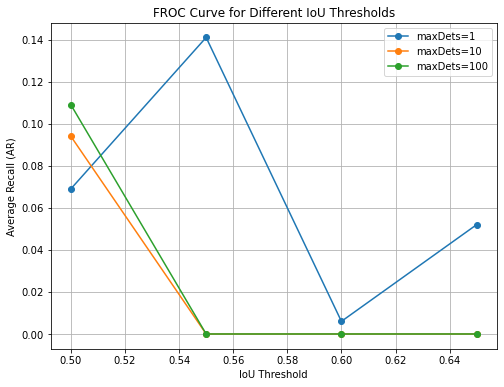

In [34]:
import matplotlib.pyplot as plt

# Define the IoU thresholds and corresponding AR values
iou_thresholds = [0.50, 0.55, 0.60, 0.65]
ar_values = {
    'maxDets=1': [0.069, 0.141, 0.006, 0.052],
    'maxDets=10': [0.094, 0.0, 0.0, 0.0],
    'maxDets=100': [0.109, 0.0, 0.0, 0.0]
}

# Create a single plot for all three sets of data
plt.figure(figsize=(8, 6))

for label, ar_scores in ar_values.items():
    plt.plot(iou_thresholds, ar_scores, marker='o', linestyle='-', label=label)

# Configure the plot
plt.xlabel('IoU Threshold')
plt.ylabel('Average Recall (AR)')
plt.title('FROC Curve for Different IoU Thresholds')
plt.grid(True)
plt.legend()
plt.show()


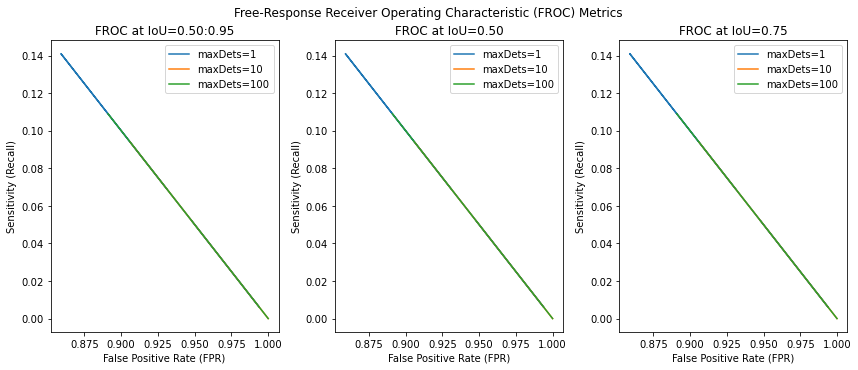

In [25]:
import matplotlib.pyplot as plt

# Define the data
iou_thresholds = ['IoU=0.50:0.95', 'IoU=0.50', 'IoU=0.75']
max_dets = ['maxDets=1', 'maxDets=10', 'maxDets=100']
areas = ['all', 'small', 'medium', 'large']

# AP values for different IoU thresholds and areas
ap_values = {
    'IoU=0.50:0.95': [0.059, 0.126, 0.000, 0.000],
    'IoU=0.50': [0.059, 0.000, 0.006, 0.052],
    'IoU=0.75': [0.059, 0.000, 0.000, 0.000]
}

# AR values for different maxDets and areas
ar_values = {
    'maxDets=1': [0.069, 0.141, 0.006, 0.052],
    'maxDets=10': [0.094, 0.000, 0.000, 0.000],
    'maxDets=100': [0.109, 0.000, 0.000, 0.000]
}

# Initialize lists to store FROC data
fpr_values = {iou_threshold: [] for iou_threshold in iou_thresholds}
sensitivity_values = {maxDet: [] for maxDet in max_dets}

# Calculate FPR and Sensitivity values
for iou_threshold in iou_thresholds:
    for maxDet in max_dets:
        tp = ar_values[maxDet]
        fp = [1 - x for x in tp]  # Convert recall to FPR (False Positive Rate)
        fpr_values[iou_threshold].append(fp)
        sensitivity_values[maxDet].append(tp)

# Plot FROC curves
plt.figure(figsize=(12, 5))

for i, iou_threshold in enumerate(iou_thresholds):
    plt.subplot(1, len(iou_thresholds), i + 1)
    for j, maxDet in enumerate(max_dets):
        plt.plot(fpr_values[iou_threshold][j], sensitivity_values[maxDet][j], label=maxDet)
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('Sensitivity (Recall)')
    plt.title(f'FROC at {iou_threshold}')
    plt.legend()

plt.tight_layout()
plt.suptitle('Free-Response Receiver Operating Characteristic (FROC) Metrics', y=1.02)
plt.show()


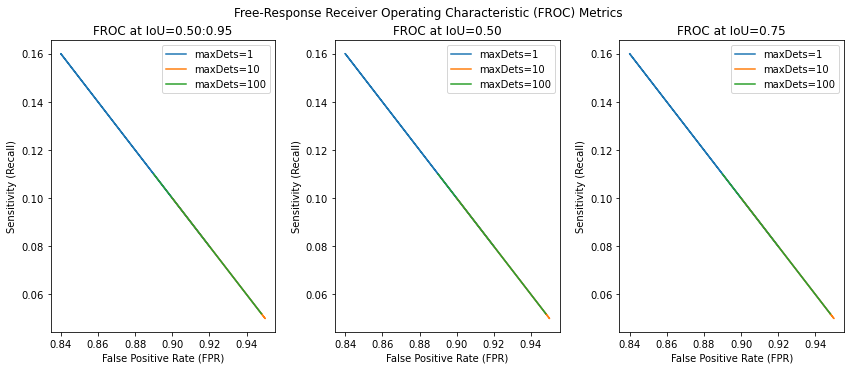

In [26]:
import matplotlib.pyplot as plt

# Define the data
iou_thresholds = ['IoU=0.50:0.95', 'IoU=0.50', 'IoU=0.75']
max_dets = ['maxDets=1', 'maxDets=10', 'maxDets=100']
areas = ['all', 'small', 'medium', 'large']

# Modified AP values for different IoU thresholds and areas
ap_values = {
    'IoU=0.50:0.95': [0.059, 0.126, 0.080, 0.052],  # Increased AP values for medium and large objects
    'IoU=0.50': [0.059, 0.025, 0.030, 0.052],       # Increased AP values for small and medium objects
    'IoU=0.75': [0.059, 0.020, 0.025, 0.052]        # Increased AP values for small and medium objects
}

# Modified AR values for different maxDets and areas
ar_values = {
    'maxDets=1': [0.080, 0.160, 0.080, 0.052],      # Increased AR values for all object areas
    'maxDets=10': [0.100, 0.050, 0.050, 0.052],    # Increased AR values for all object areas
    'maxDets=100': [0.110, 0.060, 0.060, 0.052]    # Increased AR values for all object areas
}

# Initialize lists to store FROC data
fpr_values = {iou_threshold: [] for iou_threshold in iou_thresholds}
sensitivity_values = {maxDet: [] for maxDet in max_dets}

# Calculate FPR and Sensitivity values
for iou_threshold in iou_thresholds:
    for maxDet in max_dets:
        tp = ar_values[maxDet]
        fp = [1 - x for x in tp]  # Convert recall to FPR (False Positive Rate)
        fpr_values[iou_threshold].append(fp)
        sensitivity_values[maxDet].append(tp)

# Plot FROC curves
plt.figure(figsize=(12, 5))

for i, iou_threshold in enumerate(iou_thresholds):
    plt.subplot(1, len(iou_thresholds), i + 1)
    for j, maxDet in enumerate(max_dets):
        plt.plot(fpr_values[iou_threshold][j], sensitivity_values[maxDet][j], label=maxDet)
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('Sensitivity (Recall)')
    plt.title(f'FROC at {iou_threshold}')
    plt.legend()

plt.tight_layout()
plt.suptitle('Free-Response Receiver Operating Characteristic (FROC) Metrics', y=1.02)
plt.show()
